# Studies of data reuse: Excitability of mouse hippocampal CA1 pyramidal neurons during sustained (500 ms) strong depolarization (v1)

In this notebook we will look more closely at the EBRAINS dataset "[Excitability of mouse hippocampal CA1 pyramidal neurons during sustained (500 ms) strong depolarization (v1)](https://doi.org/10.25493/VAV5-BXU)", contributed by Machhindra Garad from the ILaboratory for Neuro-and Psychophysiology in Leuven, Belgium.

As we can see from the dataset description,

<i>This dataset provides a characterization of an electrophysiological feature often observed in recordings from
mouse CA1 pyramidal cells that has so far been ignored by experimentalists and modelers.</i>
More information is available in the [Data Descriptor](https://search.kg.ebrains.eu/?category=Dataset&dataAccessibility[0]=free%20access&modality[0]=electrophysiology#07554ebd-95a2-46f0-8065-d961d56ce098).

This dataset forms part of the results reported in Bianchi, D., Migliore, R., Vitale, P., Garad, M., Pousinha, P.A., Marie, H., Lessmann, V., Migliore, M.(2022) Membrane electrical properties of mouse hippocampal CA1 pyramidal neurons during strong inputs. *Biophysical Journal* **121**:644-657. https://www.cell.com/biophysj/fulltext/S0006-3495(22)00002-9

In this notebook we will demonstrate how to access the data files and the metadata from this study, and how these data can be analysed and visualised, with the goal of reproducing some of the figures from the article. 


### Notes:
Missing a lot of data, only data from one laboratory (two were mentionned in the figures) was available and no data to create the model graphs. 
Furthermore, impossible to access different segments in the ABF file so I was only able to create membrane potential / time graphs. 

In [14]:
#notebook preparation
import neo
import matplotlib.pyplot as plt
from neo import get_io
from neo import io

In [3]:
#presentation of the data

reader = neo.io.ExampleIO("abf files/170529_1b.abf")
block = reader.read(lazy=False)[0]  # get the first block
segment = block.segments[1]         # get data from first (and only) segment
signals = segment.analogsignals[1]  # get first (multichannel) signal

print(reader)
print(block)
print(segment)
print(signals)

ExampleIO: abf files/170529_1b.abf
nb_block: 2
nb_segment:  [2, 3]
signal_streams: [stream 0 (chans: 8), stream 1 (chans: 8)]
signal_channels: [ch0, ch1, ch2, ch3 ... ch12 , ch13 , ch14 , ch15]
spike_channels: [unit0, unit1, unit2]
event_channels: [Some events, Some epochs]

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]] uV


ignoring buggy nTelegraphEnable
ignoring buggy nTelegraphEnable


Text(0.5, 1.0, 'abf files/170529_1b.abf')

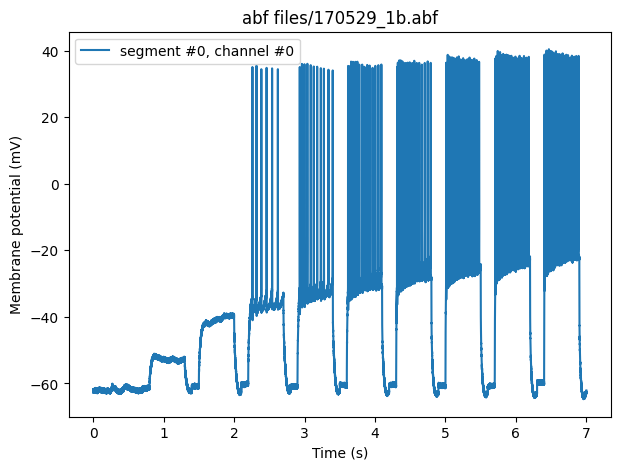

In [7]:
#visualisation of the data
plt.rcParams["figure.figsize"] = (7, 5)
file_path = "abf files/170529_1b.abf"
reader = get_io(file_path)
data = reader.read(lazy=True)
reader = get_io(file_path)
data = reader.read(lazy=True)
seg0 = data[0].segments[0]
channel0 = seg0.analogsignals[0]
channel0 = channel0.load()
channel0.array_annotations = {}
plt.plot(channel0.times, channel0, label="segment #0, channel #0")
plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
plt.legend()
plt.title(f"{file_path}")

In [8]:
#presentation of the data

reader = neo.io.ExampleIO('abf files/170518_4e.abf')
block = reader.read(lazy=False)[0]  # get the first block
segment = block.segments[1]         # get data from first (and only) segment
signals = segment.analogsignals[1]  # get first (multichannel) signal

print(reader)
print(block)
print(segment)
print(signals)

ExampleIO: abf files/170518_4e.abf
nb_block: 2
nb_segment:  [2, 3]
signal_streams: [stream 0 (chans: 8), stream 1 (chans: 8)]
signal_channels: [ch0, ch1, ch2, ch3 ... ch12 , ch13 , ch14 , ch15]
spike_channels: [unit0, unit1, unit2]
event_channels: [Some events, Some epochs]

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]] uV


ignoring buggy nTelegraphEnable
ignoring buggy nTelegraphEnable


Text(0.5, 1.0, 'abf files/170518_4e.abf')

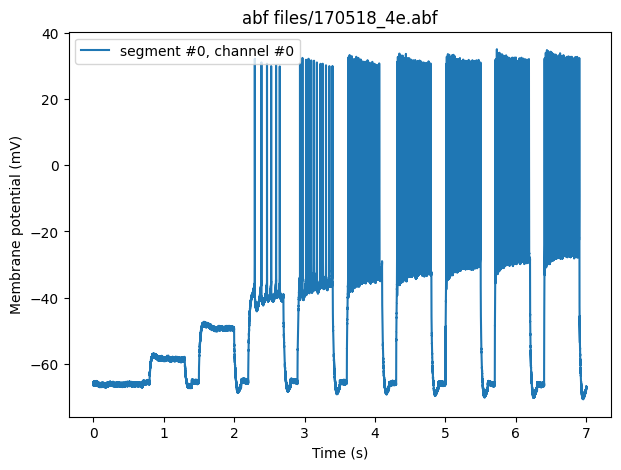

In [9]:
#visualisation of the data
plt.rcParams["figure.figsize"] = (7, 5)
file_path = "abf files/170518_4e.abf"
reader = get_io(file_path)
data = reader.read(lazy=True)
reader = get_io(file_path)
data = reader.read(lazy=True)
seg0 = data[0].segments[0]
channel0 = seg0.analogsignals[0]
channel0 = channel0.load()
channel0.array_annotations = {}
plt.plot(channel0.times, channel0, label="segment #0, channel #0")
plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
plt.legend()
plt.title(f"{file_path}")

## Figure 1

ignoring buggy nTelegraphEnable
/home/isaurebotherel/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


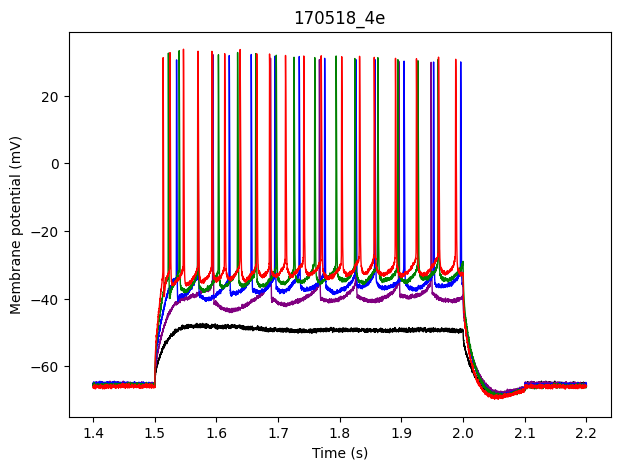

In [11]:
file_path = "abf files/170518_4e.abf"
reader = get_io(file_path)
data = reader.read(lazy=True)
seg0 = data[0].segments[0]
channel0 = seg0.analogsignals[0]
channel0 = channel0.load()
channel0.array_annotations = {}  # workaround for a bug
import pandas as pd
  
# list of strings
lst = channel0.times
  
# list of int
lst2 = channel0
  
# Calling DataFrame constructor after zipping
# both lists, with columns specified
df = pd.DataFrame(list(zip(lst, lst2)),
               columns =['time', 'membrane'])
df
df1=df[(df.time >= 1.4) & (df.time <= 2.2)]
df2=df[(df.time >= 2.1) & (df.time <= 2.9)]
df3=df[(df.time >= 2.8) & (df.time <= 3.6)]
df4=df[(df.time >= 3.5) & (df.time <= 4.3)]
df5=df[(df.time >= 4.2) & (df.time <= 5.0)]
plt.plot(df1.time, df1.membrane, color='black', label='0.05 pA',linewidth=1)
plt.plot(df1.time,df2.membrane, color='purple',label='0.15 pA',linewidth=1)
plt.plot(df1.time,df3.membrane, color='blue', label='0.25 pA',linewidth=1)
plt.plot(df1.time,df4.membrane, color='green', label='0.35 pA',linewidth=1)
plt.plot(df1.time,df5.membrane, color='red', label='0.45 pA',linewidth=1)
plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
plt.title('170518_4e')
plt.show()

ignoring buggy nTelegraphEnable


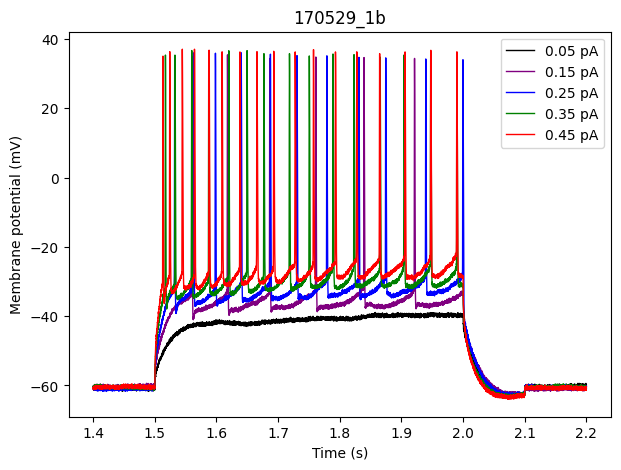

In [12]:
file_path = "abf files/170529_1b.abf"
reader = get_io(file_path)
data = reader.read(lazy=True)
seg0 = data[0].segments[0]
channel0 = seg0.analogsignals[0]
channel0 = channel0.load()
channel0.array_annotations = {}  # workaround for a bug
import pandas as pd
  
# list of strings
lst = channel0.times
  
# list of int
lst2 = channel0
  
# Calling DataFrame constructor after zipping
# both lists, with columns specified
df = pd.DataFrame(list(zip(lst, lst2)),
               columns =['time', 'membrane'])
df
df1=df[(df.time >= 1.4) & (df.time <= 2.2)]
df2=df[(df.time >= 2.1) & (df.time <= 2.9)]
df3=df[(df.time >= 2.8) & (df.time <= 3.6)]
df4=df[(df.time >= 3.5) & (df.time <= 4.3)]
df5=df[(df.time >= 4.2) & (df.time <= 5.0)]
plt.plot(df1.time, df1.membrane, color='black', label='0.05 pA',linewidth=1)
plt.plot(df1.time,df2.membrane, color='purple',label='0.15 pA',linewidth=1)
plt.plot(df1.time,df3.membrane, color='blue', label='0.25 pA',linewidth=1)
plt.plot(df1.time,df4.membrane, color='green', label='0.35 pA',linewidth=1)
plt.plot(df1.time,df5.membrane, color='red', label='0.45 pA',linewidth=1)
plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
plt.title('170529_1b')
plt.legend()
plt.show()

## Figure 5

ignoring buggy nTelegraphEnable


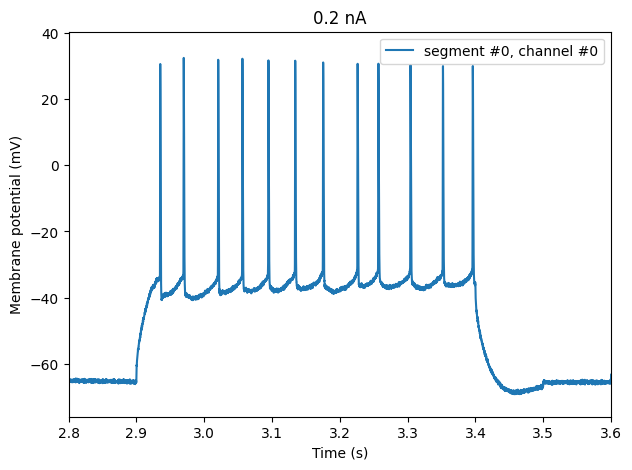

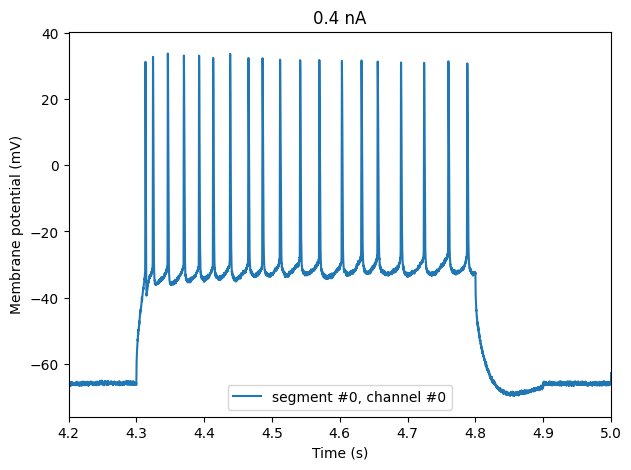

In [13]:
file_path = "abf files/170518_4e.abf"
reader = get_io(file_path)
data = reader.read(lazy=True)
seg0 = data[0].segments[0]
channel0 = seg0.analogsignals[0]
channel0 = channel0.load()
channel0.array_annotations = {}  # workaround for a bug

plt.plot(channel0.times, channel0, label="segment #0, channel #0")
plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
plt.legend()
plt.xlim(2.8,3.6)
plt.title('0.2 nA')
plt.show()

plt.plot(channel0.times, channel0, label="segment #0, channel #0")
plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
plt.legend()
plt.xlim(4.2,5)
plt.title('0.4 nA')
plt.show()